In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [65]:
data = "Vader1.csv"
df = pd.read_csv(data)
df.head()

,Unnamed: 0,Unnamed: 0.1,state,text,lat,lon,followers,favorites,friends,statuses_count,compound,pos,neg
0,0,0,Alabama,The last visits -----&gt; https://t.co/iVCRNsA5wR,32.886361,-86.813639,1103,1624,1049,1014,0.0000,0.000,0.000
1,1,1,Alabama,RT @GDouglasJones: I dont think thats the f...,32.886361,-86.813639,1423,334377,1539,166036,0.4199,0.218,0.000
2,2,2,Alabama,RT @YouLove_Ebony: I salute everybody thats ou...,32.886361,-86.813639,1664,2997,571,108941,-0.6059,0.000,0.220
3,3,3,Alabama,We just not on the same level no more and that...,32.886361,-86.813639,442,261,554,11537,-0.2724,0.093,0.142
4,4,4,Alabama,RT @UWA_Softball: Our own Bree Thompson singin...,32.886361,-86.813639,243,325,243,1286,0.6514,0.213,0.000


In [66]:

yes = ["Arizona", "Colorado", "Utah", "Wyoming", "Idaho", "Alaska", "Colorado", "Oregon", "Montana", "New Mexico"] 
for index, row in df.iterrows():
    if row["state"] in yes:
        df.set_value(index, "In Belt (Y/N)", "Y")
    else:
        df.set_value(index, "In Belt (Y/N)", "N")

df

,Unnamed: 0,Unnamed: 0.1,state,text,lat,lon,followers,favorites,friends,statuses_count,compound,pos,neg,In Belt (Y/N)
0,0,0,Alabama,The last visits -----&gt; https://t.co/iVCRNsA5wR,32.886361,-86.813639,1103,1624,1049,1014,0.0000,0.000,0.000,N
1,1,1,Alabama,RT @GDouglasJones: I dont think thats the f...,32.886361,-86.813639,1423,334377,1539,166036,0.4199,0.218,0.000,N
2,2,2,Alabama,RT @YouLove_Ebony: I salute everybody thats ou...,32.886361,-86.813639,1664,2997,571,108941,-0.6059,0.000,0.220,N
3,3,3,Alabama,We just not on the same level no more and that...,32.886361,-86.813639,442,261,554,11537,-0.2724,0.093,0.142,N
4,4,4,Alabama,RT @UWA_Softball: Our own Bree Thompson singin...,32.886361,-86.813639,243,325,243,1286,0.6514,0.213,0.000,N
5,5,5,Alabama,I will say this. I think I have a stunningly b...,32.886361,-86.813639,245,31057,411,5734,0.5994,0.358,0.000,N
6,6,6,Alabama,RT @CalebHorton5: I'm very blessed and I want ...,32.886361,-86.813639,419,608,349,292,0.8719,0.391,0.000,N
7,7,7,Alabama,I added a video to a @YouTube playlist https:/...,32.886361,-86.813639,2154,1696,4157,2168,0.0000,0.000,0.000,N
8,8,8,Alabama,RT @HailStateMKTG: Celebrate #MaroonFriday tom...,32.886361,-86.813639,7572,248,166,3485,0.8684,0.305,0.000,N
9,9,9,Alabama,"Halftime: Lee 29, Carver 20.",32.886361,-86.813639,749,75,3088,8074,0.0000,0.000,0.000,N


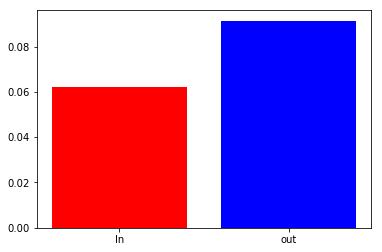

In [89]:

compound_total = df.groupby("state")["compound"].sum()

ss = {"Suicide": 0.0, "Non":0.0}
cou = {"Suicide": 0.0, "Non":0.0}
for each in compound_total.index:
    u = df.loc[df["state"]==each]["state"]
    n = compound_total[each]/len(u)
    #print(each)
    if each in yes:
        cou["Suicide"] = cou["Suicide"] + 1
        ss["Suicide"] = ss["Suicide"] + n
        
    else:
        cou["Non"] = cou["Non"] + 1
        ss["Non"] = ss["Non"] + n
ss["Suicide"] = ss["Suicide"]/len(yes)
ss["Non"] = ss["Non"]/(50-len(yes))
plt.bar(np.arange(0,2,1), [ss["Suicide"], ss["Non"]], color= ["r","b"])
x_axis = np.arange(2)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["In","out"])
plt.show()


In [75]:
is_in = []
nottt = []
for index, row in df.iterrows():
    if row["state"] in yes:
        is_in.append(row["compound"])
    else:
        nottt.append(row["compound"])
is_in

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4215,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.128,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.29600000000000004,
 0.0,
 0.4215,
 0.0,
 0.0,
 0.4215,
 0.0,
 0.2263,
 0.0,
 0.2263,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4215,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7313,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5994,
 0.5994,
 0.7313,
 0.0,
 0.0,
 0.7313,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.264,
 -0.29600000000000004,
 0.0,
 0.0,
 0.0,
 0.3612,
 0.9803,
 0.6696,
 0.0,
 0.3612,
 0.0,
 -0.4871,
 0.0,
 0.0,
 0.0,
 0.4767,
 0.5562,
 0.0,
 0.0,
 0.4588,
 0.0,
 -0.29600000000000004,
 0.2732,
 0.6808,
 0.0,
 0.6369,
 0.0,
 0.0,
 0.8377,
 -0.6705,
 -0.4588,
 0.0,
 0.0,
 -0.2003,
 0.0,
 0.0,
 0.5994,
 0.6808,
 0.0,
 -0.6865,
 0.4588,
 0.0,
 0.1695,
 -0.5562,
 0.0,
 0.

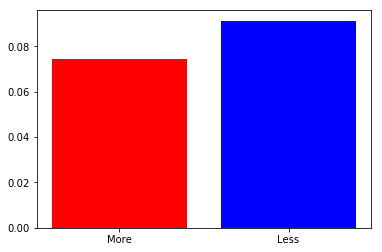

Ttest_indResult(statistic=-1.5248583902098367, pvalue=0.12735802412603928)

In [87]:
less = df.loc[df["friends"]<500]
more = df.loc[df["friends"]>500]
more_total = more["compound"].sum()/len(more)
less_total = less["compound"].sum()/len(less)
greater = []
fewer = []
for index, row in df.iterrows():
    if row["friends"]>500:
        greater.append(row["compound"])
    else:
        fewer.append(row["compound"])
plt.bar(np.arange(0,2,1), [more_total, less_total], color= ["r","b"])
x_axis = np.arange(2)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["More","Less"])
plt.show()
# less_total
#more_total
ttest_ind(greater, fewer)

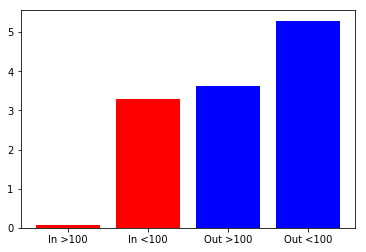

2404983

In [77]:
less = df.loc[df["followers"]<500]
more = df.loc[df["followers"]>500]
more_total = more.groupby("state")["compound"].sum()
less_total = less.groupby("state")["compound"].sum()
sd = {"Suicide": [0,0], "Non":[0,0]}
for each in more_total.index:
    u = more.loc[df["state"]==each]["state"]
    n = more_total[each]/len(u)
    if each in yes:
        sd["Suicide"][0] = sd["Suicide"][0] + n
    else:
        sd["Non"][0] = sd["Non"][0] + more_total[each]
for each in less_total.index:
    u = less.loc[df["state"]==each]["state"]
    n = less_total[each]/len(u)
    if each in yes:
        sd["Suicide"][1] = sd["Suicide"][1] + less_total[each]
    else:
        sd["Non"][1] = sd["Non"][1] + less_total[each]
sd["Suicide"][0] = sd["Suicide"][0]/len(yes)
sd["Suicide"][1] = sd["Suicide"][1]/len(yes)
sd["Non"][0] = sd["Non"][0]/(50-len(yes))
sd["Non"][1] = sd["Non"][1]/(50-len(yes))
plt.bar(np.arange(4), [sd["Suicide"][0],sd["Suicide"][1], sd["Non"][0],sd["Non"][1]], color= ["r","r","b","b"])
x_axis = np.arange(4)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["In >100","In <100","Out >100","Out <100"])
plt.show()
df["followers"].max()

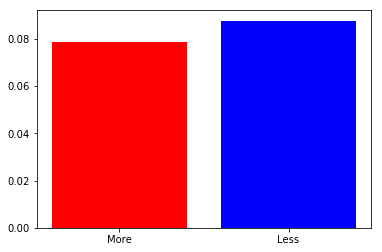

Ttest_indResult(statistic=-1.4570843054489666, pvalue=0.14515626042434376)

In [88]:
l = df.loc[df["followers"]<500]
m = df.loc[df["followers"]>500]
m_total = m["compound"].sum()/len(more)
l_total = l["compound"].sum()/len(less)
greater = []
fewer = []
for index, row in df.iterrows():
    if row["followers"]>500:
        greater.append(row["compound"])
    else:
        fewer.append(row["compound"])
plt.bar(np.arange(0,2,1), [m_total, l_total], color= ["r","b"])
x_axis = np.arange(2)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["More","Less"])
plt.show()
ttest_ind(greater, fewer)


In [40]:
in_belt = df.loc[df["In Belt (Y/N)"] == "Y"]
not_in = df.loc[df["In Belt (Y/N)"] == "N"]
not_in

,Unnamed: 0,Unnamed: 0.1,state,text,lat,lon,followers,favorites,friends,statuses_count,compound,pos,neg,In Belt (Y/N)
0,0,2,Alabama,RT @broebong: kick it under the fridge https:/...,32.886361,-86.813639,92,1134,77,1216,0.0000,0.000,0.000,N
2,2,0,Alabama,"RT @GDouglasJones: I stood up to the KKK, I wi...",32.886361,-86.813639,87,19087,462,9981,0.2235,0.082,0.000,N
3,3,1,Alabama,RT @broebong: kick it under the fridge https:/...,32.886361,-86.813639,589,4163,425,1948,0.0000,0.000,0.000,N
4,4,3,Alabama,hot rod is the best movie to come out in the l...,32.886361,-86.813639,184,15645,207,7509,0.6705,0.234,0.000,N
5,5,4,Alabama,I forgot to reply https://t.co/3Ia4aRUlXx,32.886361,-86.813639,1565,7191,648,15637,0.0000,0.000,0.000,N
6,6,5,Alabama,😭 https://t.co/r4SoOfUhMi,32.886361,-86.813639,274,2458,1150,632,0.0000,0.000,0.000,N
7,7,6,Alabama,That don't mean you gone get chased though mig...,32.886361,-86.813639,421,454,365,17550,0.0000,0.000,0.000,N
8,8,7,Alabama,RT @broebong: kick it under the fridge https:/...,32.886361,-86.813639,1392,23404,309,35960,0.0000,0.000,0.000,N
9,9,8,Alabama,@TerrellChuggs CHNBACBDAHKJD,32.886361,-86.813639,3032,2091,1907,432688,0.0000,0.000,0.000,N
10,10,9,Alabama,RT @broebong: kick it under the fridge https:/...,32.886361,-86.813639,527,3573,504,14681,0.0000,0.000,0.000,N


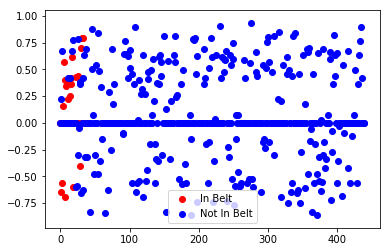

In [42]:
y = plt.scatter(np.arange(0, len(in_belt)), in_belt["compound"], c = "r", label = "In Belt")
n = plt.scatter(np.arange(0, len(not_in)), not_in["compound"], c = "b", label = "Not In Belt")
plt.legend(handles= [y, n], loc = "best")
plt.show()

In [37]:
import math

a,b,c = -11,141,-448

d = b**2-4*a*c # discriminant

if d < 0:
    print ("This equation has no real solution")
elif d == 0:
    x = (-b+math.sqrt(b**2-4*a*c))/(2*a)
    print ("This equation has one solutions: ", x)
else:
    x1 = (-b+math.sqrt(b**2-4*a*c))/(2*a)
    x2 = (-b-math.sqrt(b**2-4*a*c))/(2*a)
    print ("This equation has two solutions: ", x1, " and", x2)

This equation has two solutions:  5.818181818181818  and 7.0


In [39]:
45/7
7*(11-45/7)

32.0

In [40]:
14-64/11

8.181818181818182

In [41]:
45/(97/11)

5.103092783505154